In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx
import osmnx as ox
import seaborn as sns
from itertools import product
import pickle as pkl
from randomnetworkmodel import *
from street_network_from_json import *
import pandas as pd
import matplotlib as mpl

In [64]:
G = get_randomnetwork(5, 5, .3)
nx.set_edge_attributes(G, nx.edge_betweenness_centrality(G, weight='weight'), name='betweenness_centrality')
nx.set_edge_attributes(G, calc_bc_impact(G), name='edge_impact')
pos = nx.get_node_attributes(G, 'pos')

dict_values([0.26666666666666666, 0.2566666666666667, 0.043333333333333335, 0.14666666666666667, 0.22, 0.27666666666666667, 0.15333333333333335, 0.08, 0.07666666666666667, 0.30000000000000004, 0.01, 0.23333333333333334, 0.28, 0.4, 0.4133333333333334, 0.1, 0.4133333333333334, 0.1, 0.42000000000000004, 0.42000000000000004, 0.13333333333333333, 0.16, 0.18666666666666668, 0.21333333333333335, 0.32, 0.35333333333333333, 0.38])


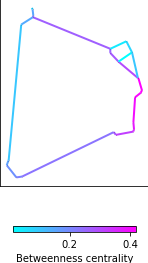

In [65]:
cm = plt.get_cmap('cool')

bc = nx.get_edge_attributes(G, 'betweenness_centrality').values()
print(bc)
norm = mpl.colors.Normalize(vmin=min(bc), vmax=max(bc))
# pos = nx.get_node_attributes(G, 'pos')
line = nx.draw_networkx(G, pos=pos, with_labels=False, node_color='k', alpha=1, width=2,
                 edge_color=bc, linewidths=0, edge_cmap=cm, node_size=.1)
# plt.colorbar(ScalarMappable(cmap=cm), panchor=False, label='Edge impact')
plt.colorbar(mappable=ScalarMappable(norm=norm, cmap=cm), ax=plt.gca(), label='Betweenness centrality', orientation='horizontal', shrink=.3)
plt.gca().set_aspect('equal')
plt.tight_layout()

dict_values([-0.34776733491993017, -0.06405550401355309, -0.05207534992537588, -0.2824210398935094, 0.22455729901980592, -0.05261990238392933, 0.15049816465652877, 0.06282521882941394, -0.04063974829575234, -0.04281795812996636, -0.04118430075430579, -0.10271872857085218, -0.09182767939978209, -0.10271872857085218, -0.1190553023274572, -0.04172885321285924, -0.2007381711104832, -0.23885684320922884, -0.16806502359727293, -0.1408374006695976, -0.2007381711104832, -0.1680650235972727, -0.14083740066959738, -0.1190553023274572, -0.08638215481424694, -0.08638215481424694, -0.09182767939978209])


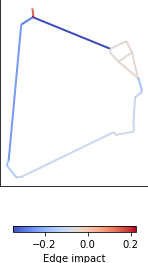

In [66]:
cm = plt.get_cmap('coolwarm')

ei = nx.get_edge_attributes(G, 'edge_impact').values()
print(ei)
norm = mpl.colors.Normalize(vmin=min(ei), vmax=max(ei))
# pos = nx.get_node_attributes(G, 'pos')
line = nx.draw_networkx(G, pos=pos, with_labels=False, node_color='k', alpha=1, width=2,
                 edge_color=ei, linewidths=0, edge_cmap=cm, node_size=.1)
# plt.colorbar(ScalarMappable(cmap=cm), panchor=False, label='Edge impact')
plt.colorbar(mappable=ScalarMappable(norm=norm, cmap=cm), ax=plt.gca(), label='Edge impact', orientation='horizontal', shrink=.3)
plt.gca().set_aspect('equal')

plt.tight_layout()

Notes:
- Negative "edge impact" means decreasing the centrality of the network, positive impact increases the centrality
- caveat: increasing centrality might mean, that the

